# Ex 9: Implement the ARIMA forecasting technique in the given data

In [1]:
# Importing necessary packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

from pandas.plotting import autocorrelation_plot

import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

from datetime import datetime
from itertools import product
from tqdm import tqdm_notebook


In [2]:
def parser(x):
    """
    Parses a string in the format 'yyyy-mm' and returns a datetime object.

    Args:
        x (str): The string to be parsed in the format 'yyyy-mm'.

    Returns:
        datetime: A datetime object representing the parsed date.

    Example:
        >>> parser('21-01')
        datetime.datetime(2021, 1, 1, 0, 0)
    """
    return datetime.strptime('190'+x, '%Y-%m')

# Importing the Dataset and Exploring it

In [3]:
series = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', header=0, parse_dates=[0], index_col=0)
series.head() # Viewing the first 5 entires

,Sunspots
Month,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0


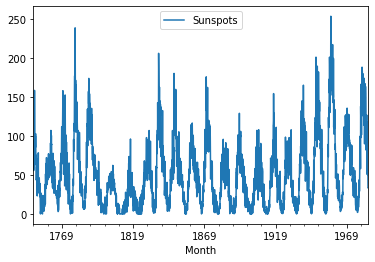

In [4]:
series.plot() # Plotting a normal line plot
plt.show()

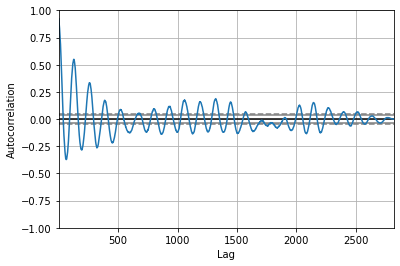

In [5]:
autocorrelation_plot(series) # Plotting the autocorrelation plot
plt.show()

In [6]:
series.index = series.index.to_period('M') # Preprocesses the given time series data by converting the index to monthly periods
series.head() # View first 5 updated entries

,Sunspots
Month,
1749-01,58.0
1749-02,62.6
1749-03,70.0
1749-04,55.7
1749-05,85.0


In [7]:
# ARIMA model
model = ARIMA(series, order=(5,1,0)) # Define model
model_fit = model.fit() # Fit the model
print(model_fit.summary()) # Summarize the model

                               SARIMAX Results                                
Dep. Variable:               Sunspots   No. Observations:                 2820
Model:                 ARIMA(5, 1, 0)   Log Likelihood              -11780.322
Date:                Mon, 25 Mar 2024   AIC                          23572.644
Time:                        13:45:22   BIC                          23608.309
Sample:                    01-31-1749   HQIC                         23585.513
                         - 12-31-1983                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4085      0.014    -28.182      0.000      -0.437      -0.380
ar.L2         -0.2891      0.016    -18.195      0.000      -0.320      -0.258
ar.L3         -0.1923      0.016    -12.137      0.0

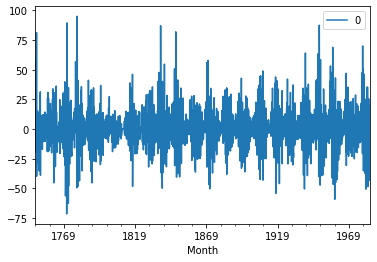

In [8]:
# Plotting a Residual plot
residuals = pd.DataFrame(model_fit.resid) # Creating a new residuals DataFrame
residuals.plot()
plt.show()

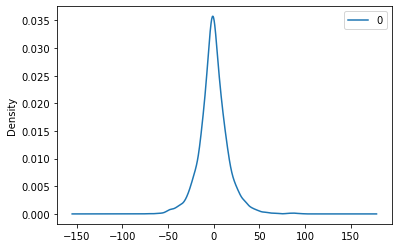

In [9]:
# Plotting a Density plot for residuals
residuals.plot(kind='kde')
plt.show()

In [10]:
residuals.describe() # Viewing the summary statistics of residuals

,0
count,2820.000000
mean,0.007876
std,15.836376
min,-71.629565
25%,-8.114013
50%,-0.544398
75%,7.766544
max,94.983859


# Rolling Forecast ARIMA model

In [11]:
# Get the values from the series
X = series.values

# Calculate the index at which to split the dataset into training and testing sets
# Here, 80% of the data is used for training and the rest for testing
size = int(len(X) * 0.8)

# Split the dataset into training and testing sets
# The training set includes elements from the start to the calculated index
# The testing set includes elements from the calculated index to the end of the dataset
train, test = X[0:size], X[size:len(X)]

In [12]:
# Initialize the history list with the training data
history = [x for x in train]

# Initialize an empty list for storing predictions
predictions = list()

# Loop over each element in the test set
for t in range(len(test)):
    # Create an ARIMA model with the current history and order (5,1,0)
    model = ARIMA(history, order=(5,1,0))
    
    # Fit the model to the data
    model_fit = model.fit()
    
    # Forecast the next value
    yhat = model_fit.forecast()[0]
    
    # Append the forecasted value to the predictions list
    predictions.append(yhat)
    
    # Add the actual observed value to the history for the next iteration
    history.append(test[t])
    
    # Print the forecasted and the actual value
    print(f'Predicted:{yhat}, expected:{test[t]}')

Predicted:107.93195823477072, expected:[132.5]
Predicted:119.73631195976171, expected:[128.5]
Predicted:121.84571455153184, expected:[83.9]
Predicted:99.5211797611051, expected:[109.3]
Predicted:110.87115317361798, expected:[116.7]
Predicted:115.45350272144394, expected:[130.3]
Predicted:122.16832271103817, expected:[145.1]
Predicted:133.22376564723342, expected:[137.7]
Predicted:130.76093832300805, expected:[100.7]
Predicted:113.44256131615334, expected:[124.9]
Predicted:124.36919409080777, expected:[74.4]
Predicted:97.02312452273226, expected:[88.8]
Predicted:97.34608358433306, expected:[98.4]
Predicted:100.8846930474231, expected:[119.2]
Predicted:108.43798905035167, expected:[86.5]
Predicted:94.55959445152148, expected:[101.]
Predicted:97.57427512891276, expected:[127.4]
Predicted:115.57490153913531, expected:[97.5]
Predicted:101.7101933232893, expected:[165.3]
Predicted:139.51723404100466, expected:[115.7]
Predicted:119.54939918484573, expected:[89.6]
Predicted:102.80173120601138,

In [13]:
# Evaluating the forecast using RMSE
rmse = np.sqrt(sklearn.metrics.mean_squared_error(test, predictions))
print("Test RMSE: ", rmse)

Test RMSE:  18.909569874425742


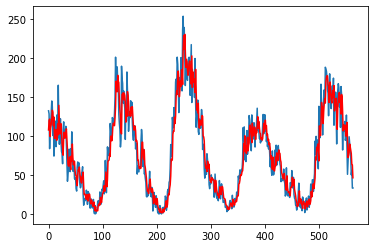

In [14]:
plt.plot(test) # Plotting the updated dataset
plt.plot(predictions, color='red')
plt.show()

# Ex 10: Implement the Seasonal ARIMA forecasting technique in the given data

In [15]:
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension

In [16]:
# Set the range of values for the AR parameter (p) for the ARIMA model
ps = range(0, 5)

# Set the value for the differencing component (d) of the ARIMA model
d = 1

# Set the range of values for the MA parameter (q) for the ARIMA model
qs = range(0, 5)

# Set the range of values for the seasonal AR parameter (P) for the ARIMA model
Ps = range(0, 5)

# Set the value for the seasonal differencing component (D) of the ARIMA model
D = 1

# Set the range of values for the seasonal MA parameter (Q) for the ARIMA model
Qs = range(0, 5)

# Set the length of the seasonal period (s) for the ARIMA model
s = 5

In [17]:
# Create a list with all possible combinations of parameters

# Use the product function from itertools module to generate all possible combinations of parameters
parameters = product(ps, qs, Ps, Qs)

# Convert the combinations to a list
parameters_list = list(parameters)

# Print the number of combinations
print(len(parameters_list))

625


In [18]:
def optimize_SARIMA(parameters_list, d, D, s):
    """
    This function optimizes the SARIMA model parameters to find the best model with the lowest AIC value.
    
    parameters_list - list with (p, q, P, Q) tuples representing the parameters for the AR, MA, seasonal AR, 
                      and seasonal MA parts of the SARIMA model.
    d - integration order, the number of nonseasonal differences needed for stationarity.
    D - seasonal integration order, the number of seasonal differences needed for stationarity.
    s - length of season, the period of the seasonality.
    """
    
    # Initialize an empty list to store the results
    results = []
    
    # Initialize the best AIC to infinity
    best_aic = float('inf')
    
    # Loop over each parameter combination in the list
    for param in tqdm_notebook(parameters_list):
        try: 
            # Create and fit a SARIMA model with the current parameter combination
            model = sm.tsa.statespace.SARIMAX(test, 
                                              order=(param[0], d, param[1]), 
                                              seasonal_order=(param[2], D, param[3], s)).fit(disp=-1)
        except:
            # If the model fails to fit, skip to the next iteration
            continue
            
        # Get the AIC of the model
        aic = model.aic
        
        # If the current model's AIC is less than the best AIC found so far,
        # update the best AIC, best model, and best parameters
        if aic < best_aic:
            best_model = model
            best_aic = aic
            best_param = param
        
        # Append the current parameter combination and its corresponding AIC to the results list
        results.append([param, model.aic])
    
    # Convert the results list to a DataFrame
    result_table = pd.DataFrame(results)
    
    # Set the column names of the DataFrame
    result_table.columns = ['parameters', 'aic']
    
    # Sort the DataFrame by the AIC in ascending order and reset the index
    result_table = result_table.sort_values(by='aic', ascending=True).reset_index(drop=True)
    
    # Return the result table
    return result_table

In [19]:
result_table = optimize_SARIMA(parameters_list, d, D, s)
result_table.head()

<ipython-input-18-702f3420df87>:19: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for param in tqdm_notebook(parameters_list):


  0%|          | 0/625 [00:00<?, ?it/s]

C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Roaming\Python\Python38\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\Admin\AppData\Roami

,parameters,aic
0,"(1, 4, 2, 3)",4868.344199
1,"(1, 3, 4, 2)",4868.801472
2,"(1, 4, 1, 4)",4869.275645
3,"(1, 3, 3, 1)",4869.341861
4,"(1, 3, 3, 2)",4869.537106


In [20]:
# Set parameters that give the lowest AIC (Akaike Information Criteria)
p, q, P, Q = result_table.parameters[0]
print("Best parameters:", p, q, P, Q)

Best parameters: 1 4 2 3


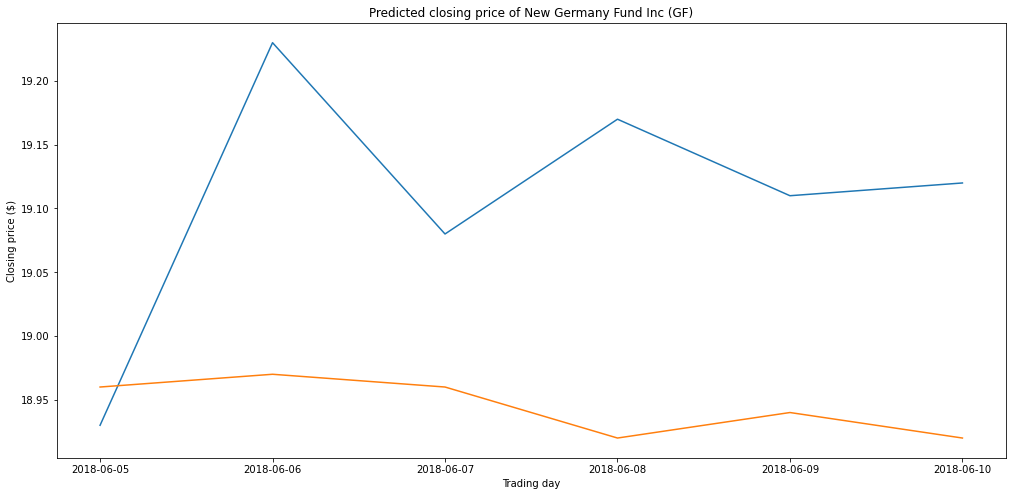

In [22]:
# Make a dataframe containing actual and predicted prices
comparison = pd.DataFrame({'actual': [18.93, 19.23, 19.08, 19.17, 19.11, 19.12],
'predicted': [18.96, 18.97, 18.96, 18.92, 18.94, 18.92]},
index = pd.date_range(start='2018-06-05', periods=6,))
#Plot predicted vs actual price
plt.figure(figsize=(17, 8))
plt.plot(comparison.actual)
plt.plot(comparison.predicted)
plt.title('Predicted closing price of New Germany Fund Inc (GF)')
plt.ylabel('Closing price ($)')
plt.xlabel('Trading day')
# plt.legend(loc='best')
plt.grid(False)
plt.show()